In [166]:
import cv2
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display

In [167]:
data_dir = '../../dataset'

classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
class_color=["#f38181","#f08a5d","#f9ed69","#a3de83","#2eb872","#70a1d7","#a29146","#0096ff","#e35ddc","#9738c9"]


In [ ]:
# choose the image ID here!
annotation='/opt/ml/level2_objectdetection_cv-level2-cv-13/pseudo_labeling/test_ensemble_0.3.json'
coco_val_pseudo=COCO(annotation)
annotation='/opt/ml/level2_objectdetection_cv-level2-cv-13/pseudo_labeling/test_cascade.json'
coco=COCO(annotation)
def get_img_with_annot(id):

    while True:
        try:
            coco_val_pseudo.loadImgs(id)
            break
        except:
            id+=1
    # annotation= '../../dataset/test.json'
    img_info=coco_val_pseudo.loadImgs(id)[0]
    path=os.path.join(data_dir, img_info['file_name'])
    img=mpimg.imread(path).copy()
    plt.figure(figsize=(20,40))
    ax=plt.subplot(1, 2, 1)   
    plt.imshow(img)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.title(f"Dyhead Image and Annotation of ID: {id}")
    plt.text(0,1045,f"Number of Objects: {len(coco_val_pseudo.getAnnIds(id))}")
    for a in coco_val_pseudo.getAnnIds(id):
        x,y,w,h=coco_val_pseudo.anns[a]['bbox']
        v=int(coco_val_pseudo.anns[a]['category_id'])
        rect=patches.Rectangle((x,y),w,h,linewidth=1,edgecolor=class_color[v],facecolor='none')
        ax.text(x,y,classes[v],bbox=dict(facecolor=class_color[v], pad=0.2,lw=0))
        ax.add_patch(rect)


    ax=plt.subplot(1, 2, 2)   
    plt.imshow(img)
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    plt.title(f"Cascade Image and Annotation of ID: {id}")
    plt.text(0,1045,f"Number of Objects: {len(coco.getAnnIds(id))}")
    for a in coco.getAnnIds(id):
        x,y,w,h=coco.anns[a]['bbox']
        rect=patches.Rectangle((x,y),w,h,linewidth=1,edgecolor=class_color[coco.anns[a]['category_id']],facecolor='none')
        ax.text(x,y,classes[coco.anns[a]['category_id']],bbox=dict(facecolor=class_color[coco.anns[a]['category_id']], pad=0.2,lw=0))
        ax.add_patch(rect)
    plt.show()

In [177]:
ID=1000

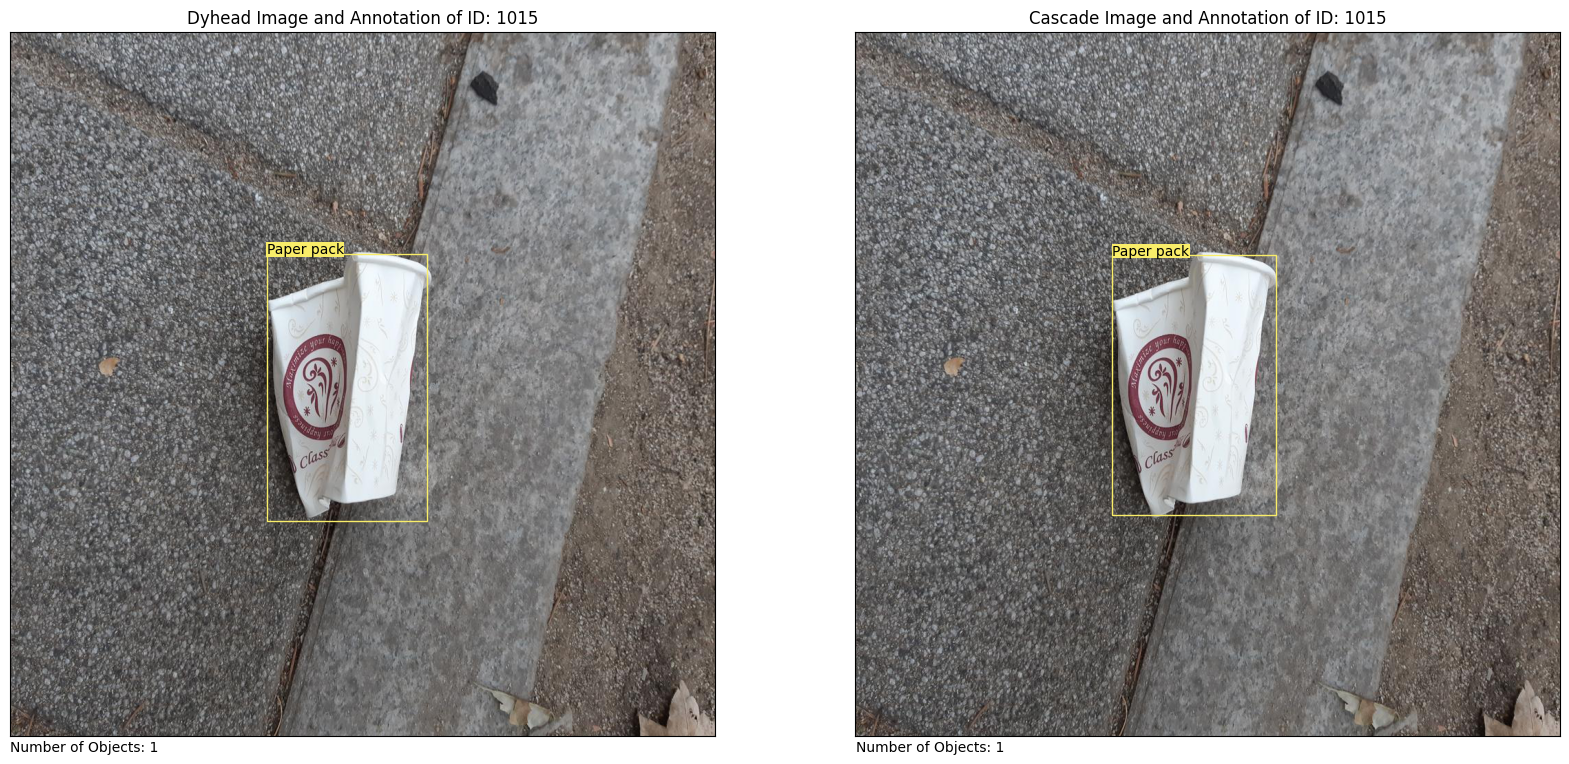

In [193]:
# set ID of the Image Here!
get_img_with_annot(ID)
ID+=1